# Fun draw of V471 Tau

In [2]:
# Lets use XKCD-style to make a nice view of the bynary system V471 Tau
from matplotlib import rc
rc('text', usetex=False)


In [71]:
def draw_star(ax, x=.0, y=.0, radius=1., quote=None, color='k', lw=2, xytext=(0, 20), fc=None):
    star = P.Circle((x, y), radius=radius, transform=ax.transAxes,
                      edgecolor=color, lw=lw, facecolor='none', zorder=10)
    ax.add_patch(star)
    
    if quote:
        ax.annotate(quote, xy=(x, y+radius), xytext=xytext,
                xycoords='axes fraction', textcoords='offset points',
                ha='center', fontsize='x-large')

def draw_prominence(ax, x=.0, y=.0, radius=1., quote=None, color='k', lw=2, xytext=(0, 20), fc=None):
    prom = P.Circle((x, y), radius=radius, transform=ax.transAxes, fc=fc, #alpha=1./3.,
                      edgecolor=color, lw=lw, facecolor='none', zorder=1)
    ax.add_patch(prom)
    
    # draw the radius
#    lprom = P.Line2D([x, x], [y, y+radius], 
#                      color='k', lw=lw, transform=ax.transAxes)
#    ax.add_line(lprom)
    
    ax.annotate('', xy=(x, y),  xycoords='data',
        xytext=(x, y+radius), textcoords='data',
        arrowprops=dict(arrowstyle='<-', color='black', lw=3.),
        ha='center') 
    

    ax.annotate(r'$\ell$', xy=(x+0.2*radius, y+0.4*radius), xytext=(0,0),
                xycoords='axes fraction', textcoords='offset points',
                ha='left', va='center', fontsize='x-large')    
    
    if quote:
        ax.annotate(quote, xy=(x, y+radius), xytext=xytext,
                xycoords='axes fraction', textcoords='offset points',
                ha='center', fontsize='x-large')  

        
def draw_points(ax, x=.0, y=.0, dy=0.02, lw = 2., quote=None, xytext=(0, -5), top=False):
    ax.annotate('', xy=(x, y),  xycoords='data',
        xytext=(XINIT, y), textcoords='data',
        arrowprops=dict(arrowstyle='|-|', color='black', lw=3.),
        ha='center')
    if top:
        ypos = y + 3*dy
        ha = 'right'
    else: 
        ypos = y - 3*dy    
        ha = 'left'
 
    
    if quote:
        ax.annotate(quote, xy=(x, ypos), xytext=xytext,
                xycoords='axes fraction', textcoords='offset points',
                ha='center', fontsize='x-large')   
        
        
def draw_l3(ax, x=.0, y=.0, dy=0.02, lw = 2., quote=None, xytext=(0, -5), top=False):
    ax.annotate('', xy=(x, y),  xycoords='data',
        xytext=(XINIT + 0.008, y), textcoords='data',
        arrowprops=dict(arrowstyle='|-|', color='black', lw=3.),
        ha='center')
    if top:
        ypos = y + 3*dy
        ha = 'right'
    else: 
        ypos = y - 3*dy    
        ha = 'left'
 
    
    if quote:
        ax.annotate(quote, xy=(x, ypos), xytext=xytext,
                xycoords='axes fraction', textcoords='offset points',
                ha='center', fontsize='x-large')           
        
def draw_axis(ax, x=.0, y=.0, dy=0.02, lw = 2., quote=None, xytext=(0, -5), top=False):
    ax.annotate('', xy=(x, y),  xycoords='data',
        xytext=(XINIT, y), textcoords='data',
        arrowprops=dict(arrowstyle='->, head_width=0.5, head_length=0.8', color='black', lw=3.),
        ha='center')  
    ax.annotate(r'$\mathbf{\hat x}$', xy=(x, y),  xycoords='data',
        xytext=((x+XINIT)/2., 1.05*y), textcoords='data',
        ha='center', fontsize='xx-large')  

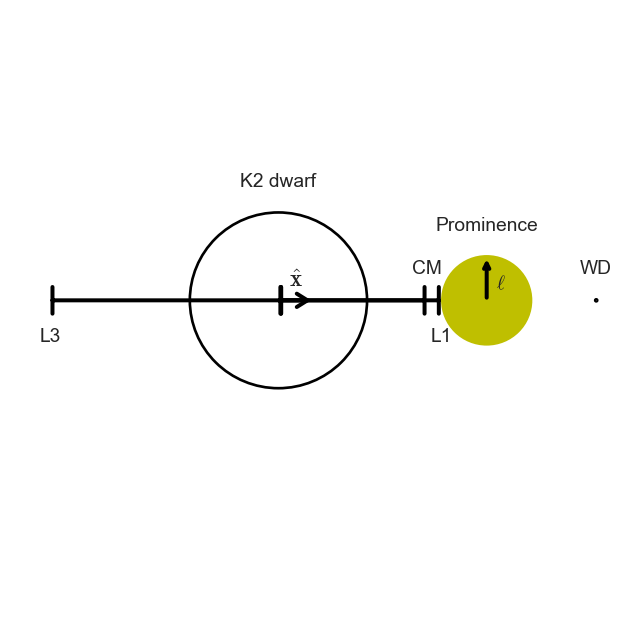

In [79]:
P.style.use(['seaborn-white', 'seaborn-paper', 'seaborn-ticks'])



scale=6.5
#stars
RK2 = 1./scale
RWD = 0.01128*RK2
Dist = 3.586*RK2 

#prominence
Dprom = 2.35*RK2
Rprom = 0.5*RK2 

# L1
Dl1 = 1.84*RK2
# L2
Dl2 = 6.02*RK2
# L3
Dl3 = -2.58*RK2
# CM
DCM = 1.679*RK2

XINIT = RK2*2.69
YINIT = 0.5
#with P.xkcd():
if True:
    fig, ax = P.subplots(figsize=(6,3.5), dpi=96)
    # Stars
    draw_star(ax, x=XINIT, y=YINIT, radius=RK2, quote='K2 dwarf')
    draw_star(ax, x=Dist + XINIT, y=YINIT, radius=RWD, quote='WD')
    # Prominence
    draw_prominence(ax, x=Dprom + XINIT, y=YINIT, radius=Rprom, quote='Prominence', color='y', fc='y')
    # L1
    draw_points(ax, x = Dl1  + XINIT, y= YINIT, quote= 'L1') 
    # L2
#    draw_points(ax, x = Dl2  + XINIT, y= YINIT, quote= 'L2') 
    # L3
    draw_l3(ax, x = Dl3  + XINIT, y= YINIT, quote= 'L3')
    # CM 
    draw_points(ax, x = DCM  + XINIT, y= YINIT, top=True, quote= 'CM') # r'd$_\mathrm{CM}$')
    #
    draw_axis(ax, x = RK2*2/5 + XINIT, y= YINIT)
    
    #P.text(0.5, 0.79, 'V471 Tau', fontsize='x-large', ha='center', fontweight='bold')
    
    
    # remove axis
    P.axis('off')
fig.subplots_adjust(left=0, right=1, top=1.3, bottom=-0.4) 
P.savefig('figs/system.pdf')